# Python機器學習與深度學習入門 
## Q5-1 運用真實資料做回歸分析：上市公司董監事持股額與姓名是否有關係
## by R07522717 林温雅

`Package`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

處理中文顯示

In [2]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [
    u'Microsoft Yahei',
] + rcParams['font.sans-serif']
rcParams['axes.unicode_minus'] = False

讀入csv，來源:政府資料開放平臺—上市公司董監事持股餘額明細資料
捨去不要的欄位，並抽樣

In [3]:
df_raw = pd.read_csv('http://mopsfin.twse.com.tw/opendata/t187ap11_L.csv').drop(['公司代號','選任時持股','設質股數佔持股比例','內部人關係人目前持股合計','內部人關係人設質股數','內部人關係人設質比例','設質股數'],axis=1)
df_train = df_raw[0:-1:100]

資料欄位示例

In [4]:
df_train[80:81]

,出表日期,公司名稱,職稱,姓名,目前持股
8000,108/03/20,精技電腦,副總經理本人,黃建華,117551


資料處理，本作業將作出兩組數據，分別是
*    第一組：姓名 vs. 持股
*    第二組：姓名 vs. 持股公司
    
希望能找出”姓名“對應的持股與對應公司關係，舉例：“林温雅”最有可能在“中鼎公司”持股550000!

本作業x軸設定為“姓名”：利用function ord('林')得到字元'林'的unicode整數編碼值

以上述示例資料舉例，將產生下列數據

* 姓名 = ['黃','建','華']
* 持股 = [117551,117551,117551]
* 持股公司 = ['精技電腦','精技電腦','精技電腦']

也就是將每個字分開，故一個股東姓名若為三個字，會製造出三組data

In [5]:
name_raw = df_train['姓名']
stock_raw = df_train['目前持股']
company_raw = df_train['公司名稱']

name_list = []
stock_list = []
company_list = []
for name,stock,company in zip(name_raw, stock_raw, company_raw):
    for i in range(3):
            try:
                # 稍微訂個持股區間，以免受太大和太小的值影響
                if len(name)<4 and stock<2e5 and stock>1e3 and ord(name[i])<60000:
                    name_list.append(ord(name[i]))
                    stock_list.append(stock)
                    company_list.append(company)
            except:
                pass

name_list = np.asarray(name_list)
stock_list = np.asarray(stock_list)

先用LinearRegression進行fitting

公司編號對應：
 {'世芯-KY': 0, '三商電腦': 1, '瑞智精密': 2, '信義房屋': 3, '建通精密': 4, '復盛應用': 5, '寶一科技': 6, '台塑石化': 7, '聯發紡織': 8, '潤隆': 9, '神腦': 10, '錸寶': 11, '晶豪科技': 12, '皇昌營造': 13, '振樺電子': 14, '中電': 15, '立德電子': 16, '倫飛電腦': 17, '雄獅旅遊': 18, '燦坤實業': 19, '凱羿-KY': 20, '喬山健康': 21, '晟銘電子': 22, '臺灣企銀': 23, '台船公司': 24, '永信': 25, '鈞寶': 26, '榮成': 27, '仁寶電腦': 28, '易華電': 29, '競國實業': 30, '新光保全': 31, '國泰金': 32, '大統益': 33, '彰化銀行': 34, '山隆通運': 35, '台橡': 36, '隆達': 37, '弘憶國際': 38, '立隆電子': 39, '志聯工業': 40, '技嘉': 41, '精技電腦': 42, '聯邦銀行': 43, '潤泰全球': 44, '東元電機': 45, '長榮航空': 46, '晶彩科': 47, '信邦電子': 48, '上福全球': 49, '訊舟科技': 50, '京鼎': 51, '所羅門': 52, '毅嘉科技': 53, '飛捷': 54, '定穎電子': 55, '宏正科': 56, '中華電': 57, 'GIS-KY': 58, '兆勁': 59, '尖點': 60, '福懋油': 61, '基勝-KY': 62, '美吉吉-KY': 63, '帆宣科技': 64, '高銀': 65, '長虹': 66, '英業達': 67, '彰源': 68}


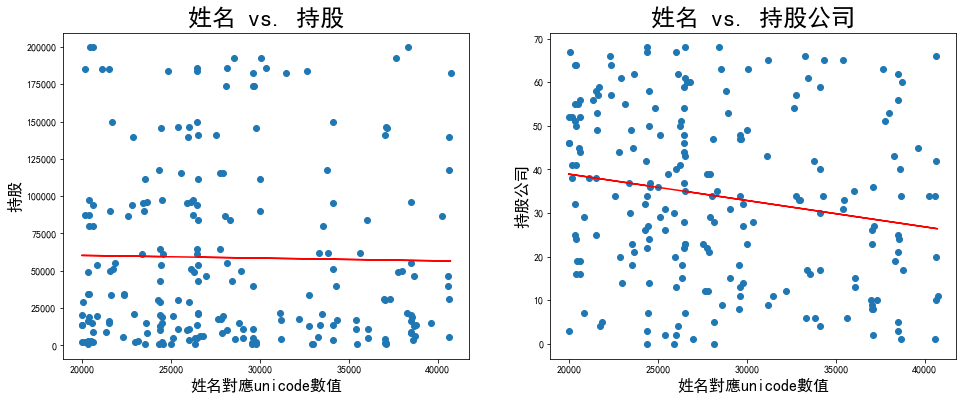

In [6]:
fig = plt.figure(figsize=(16,6))


# 第一組，姓名 vs. 持股
lin_regr1 = LinearRegression()

NAME = name_list.reshape(len(name_list), 1)
lin_regr1.fit(NAME, stock_list)

STOCK = lin_regr1.predict(NAME)

ax1 = fig.add_subplot(1,2,1)
plt.scatter(name_list, stock_list)
plt.plot(name_list, STOCK, 'r' )
plt.title('姓名 vs. 持股', size=24)
plt.xlabel('姓名對應unicode數值', size=16)
plt.ylabel('持股', size=16)

# 第二組，名字 vs. 持股公司
lin_regr2 = LinearRegression()

temp_dict = dict(enumerate(set(company_list)))
company_dict = dict((v,k) for k,v in temp_dict.items())
company_num = np.asarray(list(company_dict[k] for k in company_list))

lin_regr2.fit(NAME, company_num)

COMPANY = lin_regr2.predict(NAME)

ax2 = fig.add_subplot(1,2,2)
plt.scatter(name_list, company_num)
plt.plot(name_list, COMPANY, 'r' )
plt.title('姓名 vs. 持股公司', size=24)
plt.xlabel('姓名對應unicode數值', size=16)
plt.ylabel('持股公司', size=16);

print('公司編號對應：\n', company_dict)

<center>
<table align="center">
    <tr>
        <td bgcolor=lightgreen style="text-align:center">
            <font size="4" color=red >
            <b>Lin.....ea.......r..R....e...g....res....sio....n似...乎.......效果.........不.......彰..........
            </font>
        </td>
    </tr>
    <tr>
        <td bgcolor=lightcyan style="text-align:center">
            <font size="6" color=brown>莫非姓名編碼值和持股多寡無關？？？</font>
        </td>
    </tr>
    <tr>
        <td bgcolor=tomato style="text-align:center">
            <font size="10"> 姓名學是否是假議題！！！？？？</font>
        </td>
    </tr>
</table>
</center>


改用Polynomial再來進行測試看看

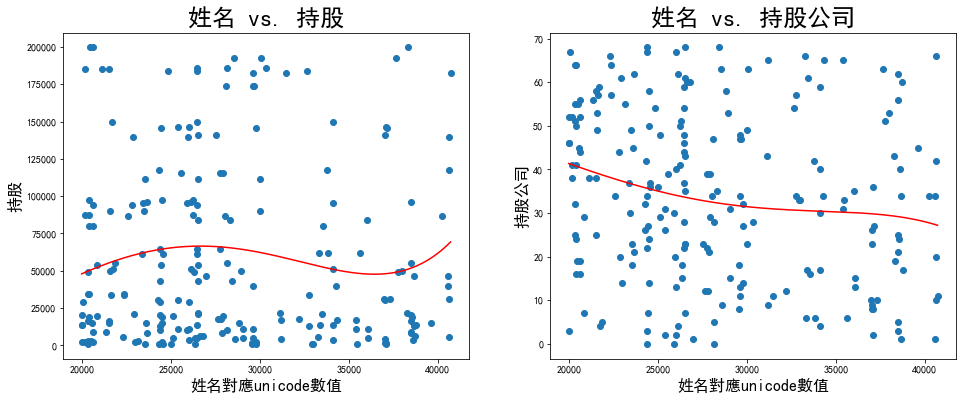

In [7]:
fig = plt.figure(figsize=(16,6))
# poly第一組，名字 vs. 持股
polynomial = PolynomialFeatures(degree = 5)
NAME_transformed = polynomial.fit_transform(NAME)

poly_regr1 = LinearRegression()
poly_regr1.fit(NAME_transformed, stock_list)

x_poly = np.linspace(min(name_list), max(name_list), 10000)
x_poly_transformed = polynomial.fit_transform(x_poly.reshape(len(x_poly), 1))#
y_poly1 = poly_regr1.predict(x_poly_transformed)

ax1 = fig.add_subplot(1,2,1)
plt.scatter(name_list, stock_list)
plt.plot(x_poly, y_poly1, 'r')
plt.title('姓名 vs. 持股', size=24)
plt.xlabel('姓名對應unicode數值', size=16)
plt.ylabel('持股', size=16)

# poly第二組，名字 vs. 持股公司
poly_regr2 = LinearRegression()
poly_regr2.fit(NAME_transformed, company_num)

y_poly2 = poly_regr2.predict(x_poly_transformed)
ax2 = fig.add_subplot(1,2,2)
plt.scatter(name_list, company_num)
plt.plot(x_poly, y_poly2, 'r')
plt.title('姓名 vs. 持股公司', size=24)
plt.xlabel('姓名對應unicode數值', size=16)
plt.ylabel('持股公司', size=16);

<table align="center">
    <tr>
        <td bgcolor=lightcyan style="text-align:center">
            <font size="4">事實證明姓名unicode編碼值與持股份額不存在什麼相關性QQ<br></font>
        </td>
    </tr>

</table>

<img src="gohome.jpg" alt="大家可以回家啦" title="大家可以回家啦" width="600"/>